In [ ]:
import pandas as pd

pred = pd.read_csv(f'aging/1_pred.csv')


In [ ]:
import matplotlib.pyplot as plt
plt.plot(pred.to_numpy().squeeze()[:200])

In [14]:
import pandas as pd
bout_lengths = {
    'P':[],
    'S':[],
    'W':[],
    'X':[]
}
import numpy as np
transition_matrix = pd.DataFrame(np.zeros((4,4)),columns=['P','S','W','X'],index=['P','S','W','X'])

for i in range(1,2):
    if i==2:
        continue
    pred = pd.read_csv(f'aging/{i}_pred.csv')
    current_state = 'X'
    current_length = 0
    for epoch in pred['0']:
        transition_matrix.loc[current_state,epoch] += 1
        if(epoch != current_state):
            bout_lengths[current_state].append(current_length)
            current_state = epoch
            current_length = 0
        current_length += 1


In [19]:
import plotly.express as px
fig = px.line(pred)
fig.show(renderer='browser')

In [16]:
bout_lengths['P'].describe()

AttributeError: 'list' object has no attribute 'describe'

<AxesSubplot:ylabel='Density'>

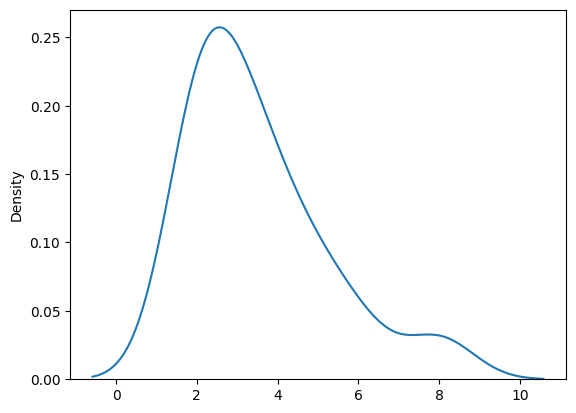

In [15]:
import seaborn as sns
sns.kdeplot(bout_lengths['P'])

<AxesSubplot:ylabel='Density'>

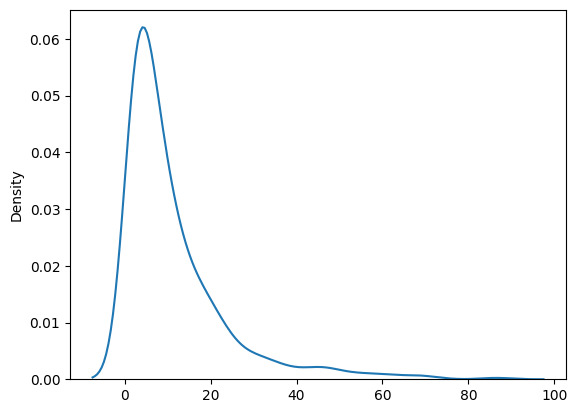

In [11]:
sns.kdeplot(bout_lengths['S'])

In [17]:
pd.DataFrame(bout_lengths['P']).describe()

,0
count,31.000000
mean,3.516129
std,1.710185
min,2.000000
25%,2.000000
50%,3.000000
75%,4.000000
max,8.000000


<AxesSubplot:ylabel='Density'>

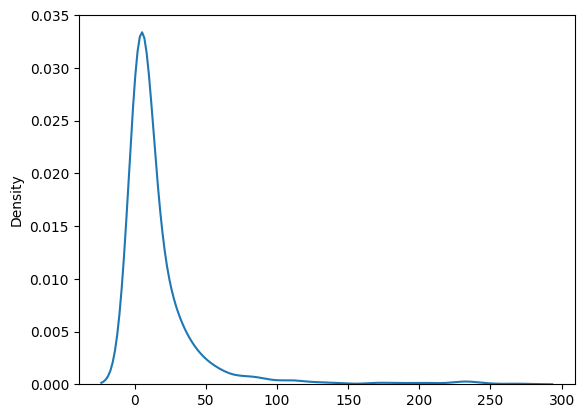

In [13]:
sns.kdeplot(bout_lengths['W'])

In [ ]:
transition_matrix = transition_matrix.drop('X').drop('X',axis=1)

In [ ]:
import seaborn as sns
sns.heatmap(transition_matrix/16,annot=True,fmt='.0f')